## INA219  
The INA219 is a current shunt and power monitor with an I2C- or SMBUS-compatible interface. The device monitors both shunt voltage drop and bus supply voltage, with programmable conversion times and filtering.  

Manufacturer link: http://www.ti.com/product/INA219  

Breakout board used: https://www.adafruit.com/product/904

In [1]:
import matplotlib.pyplot as plt

from meerkat.ina219 import INA219
from meerkat import base, parser, tools

In [2]:
# bus number 1 on Raspberry Pi
dev = INA219(bus_n=1)

In [3]:
dev.verbose = True

#### Configuration

In [4]:
# reset all configuration settings
dev.reset()

Writing to 'config' registry # 0
HEX value: 0xb99f
Binary value:
1011100110011111
1111110000000000
5432109876543210


#### Get Measurements

For this example, device is connected to a Raspberry Pi 3 5V supply.

In [5]:
dev.get_shunt_voltage()

0.0634

In [6]:
dev.get_bus_voltage()

4.5

In [7]:
dev.get_current_simple()

0.6972

Calibration Register enables the user to scale the Current Register and Power Register to the most useful value for a given application.  Refer to the datasheet for details

In [8]:
dev.set_calibration(10240)
base.time.sleep(0.1)

Writing to 'calibration' registry # 5
HEX value: 0x2800
Binary value:
0010100000000000
1111110000000000
5432109876543210


In [9]:
# confirm calibration value
dev.get_calibration()

10240

In [10]:
dev.get_shunt_voltage()

0.07486

In [11]:
dev.get_bus_voltage()

4.448

In [12]:
# simple return, just float
dev.get_current_simple()

0.7727

In [13]:
# get method, list with description and sample number
dev.get(description='test_1', n=5)

[['test_1', 1, 4.436, 0.7545999999999999],
 ['test_1', 2, 4.432, 0.7334999999999999],
 ['test_1', 3, 4.46, 0.7575999999999999],
 ['test_1', 4, 4.472, 0.7062999999999999],
 ['test_1', 5, 4.468, 0.7976999999999999]]

In [14]:
# writer method with description and sample number
dev.write(description='test_2', n=5)

#### CSV Writer Output

In [15]:
dev.writer.path

'2019_06_02_13_43_47_data.csv'

In [16]:
# load .csv data written with dev.write
m, df = parser.csv_resource(dev.writer.path)

In [17]:
df.head()

,std_time_ms,description,sample_n,voltage,current,datetime64_ns
0,2019-06-02 13:43:47.267457,test_2,1,4.448,0.7533,2019-06-02 13:43:47.267457
1,2019-06-02 13:43:47.280826,test_2,2,4.448,0.7535,2019-06-02 13:43:47.280826
2,2019-06-02 13:43:47.299146,test_2,3,4.452,0.7464,2019-06-02 13:43:47.299146
3,2019-06-02 13:43:47.308536,test_2,4,4.460,0.7424,2019-06-02 13:43:47.308536
4,2019-06-02 13:43:47.311137,test_2,5,4.452,0.7423,2019-06-02 13:43:47.311137


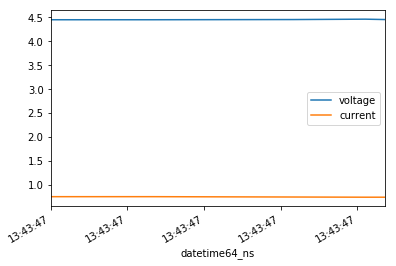

In [18]:
df.datetime64_ns = df.datetime64_ns.dt.tz_localize('UTC')  # Pandas 0.24.1 hack
df[["datetime64_ns", "voltage", "current"]].plot(x="datetime64_ns");

In [19]:
m

{'accuracy': None,
 'bytes': None,
 'case_sensitive_header': False,
 'comment': '#',
 'delimiter': ',',
 'description': None,
 'device': {'accuracy': None,
  'active': None,
  'bus': '<meerkat.i2c_pi.WrapI2C object at 0x6e92e3b0>',
  'bus_adc_averaging': None,
  'bus_adc_resolution': 12,
  'bus_voltage_range': 32,
  'calibration_date': None,
  'description': 'Texas Instruments Bidirectional Current Monitor',
  'dtype': None,
  'error': None,
  'gain': 8,
  'gain_string': '+/- 320 mV',
  'manufacturer': 'Texas Instruments',
  'mode': 7,
  'mode_description': 'shunt and bus voltages, continuous',
  'name': 'INA219',
  'precision': '12bit',
  'r_shunt': 0.1,
  'shunt_adc_averaging': None,
  'shunt_adc_resolution': 12,
  'state': None,
  'urls': 'www.ti.com/product/ADS1115',
  'version_hw': '1.0',
  'version_sw': '1.0'},
 'double_quote': True,
 'dtypes': None,
 'encoding': 'utf-8',
 'escape_char': '\\',
 'format': None,
 'hash': None,
 'header': ['description', 'sample_n', 'voltage', 'curr

#### JSON Writer Output

In [20]:
# reinitialize to JSON output
dev = INA219(bus_n=1, output='json')

In [21]:
# writing method with description and sample number
dev.write(description='test_4', n=5)

In [22]:
with open(dev.writer.path, 'r') as f:
    print(f.readline())

{"std_time_ms": "2019-06-02 13:43:50.894147", "sample_n": 1, "description": "test_4", "current": 0.7217999999999999, "voltage": 4.512}

